In [23]:
import pandas as pd

In [34]:
dat=pd.read_csv("credit_history.csv")
dat.head()

default  amount grade  years ownership   income  age
0        0    1000     B    2.0      RENT  19200.0   24
1        1    6500     A    2.0  MORTGAGE  66000.0   28
2        0    2400     A    2.0      RENT  60000.0   36
3        0   10000     C    3.0      RENT  62000.0   24
4        1    4000     C    2.0      RENT  20000.0   28

In [35]:
dat.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [36]:
dat['years'].describe()

count    7448.000000
mean        6.086332
std         6.700758
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        62.000000
Name: years, dtype: float64

In [37]:
dat['years'].fillna(4,inplace=True)

In [38]:
X=dat.drop("default",axis=1)

In [39]:
X.head()

amount grade  years ownership   income  age
0    1000     B    2.0      RENT  19200.0   24
1    6500     A    2.0  MORTGAGE  66000.0   28
2    2400     A    2.0      RENT  60000.0   36
3   10000     C    3.0      RENT  62000.0   24
4    4000     C    2.0      RENT  20000.0   28

In [40]:
X=pd.get_dummies(X, drop_first=True)

In [41]:
X.head()

amount  years   income  age  grade_B  grade_C  grade_D  grade_E  grade_F  \
0    1000    2.0  19200.0   24        1        0        0        0        0   
1    6500    2.0  66000.0   28        0        0        0        0        0   
2    2400    2.0  60000.0   36        0        0        0        0        0   
3   10000    3.0  62000.0   24        0        1        0        0        0   
4    4000    2.0  20000.0   28        0        1        0        0        0   

   grade_G  ownership_OTHER  ownership_OWN  ownership_RENT  
0        0                0              0               1  
1        0                0              0               0  
2        0                0              0               1  
3        0                0              0               1  
4        0                0              0               1

In [42]:
y=dat['default']

In [43]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2,random_state=200)

In [50]:
#from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
clf = tree.DecisionTreeClassifier(max_depth=3,random_state=89, criterion = 'gini')

In [51]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=89, splitter='best')

In [52]:
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.6203104786545925

In [53]:
pred = clf.predict(X_train)
combined = pd.DataFrame({ 'Pred': pred,
                            'Actual': y_train })

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(combined['Actual'], combined['Pred'])

0.622552984953891

In [55]:
#error
1- accuracy_score(combined['Actual'], combined['Pred'])

0.377447015046109

In [56]:
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

0.6234882070101656

In [20]:
import graphviz

In [21]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["Not Defaulter","Defaulter"],  
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)

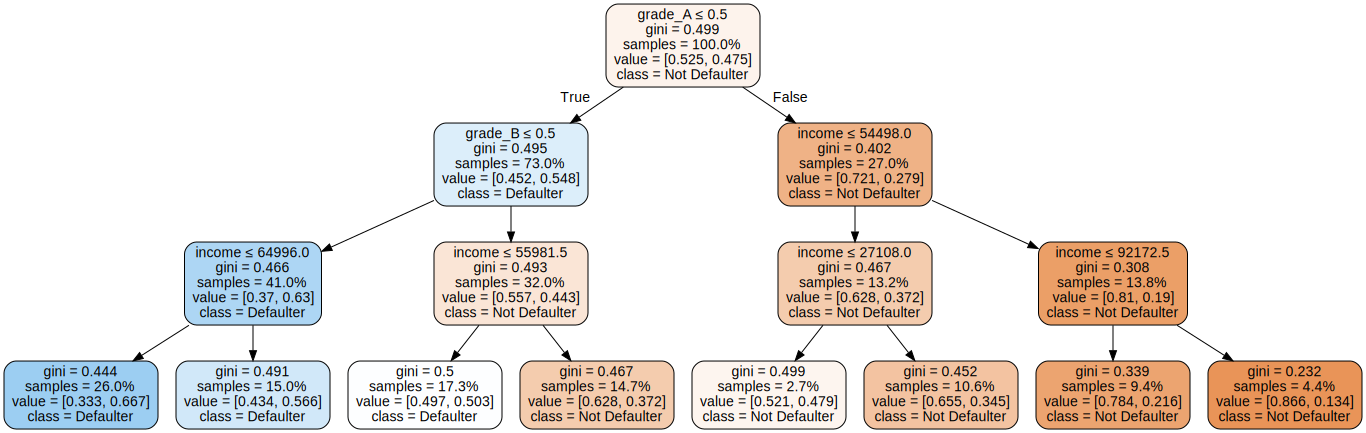

In [57]:
graph = graphviz.Source(dot_data)
graph

### Grid Search-Cross Validation

In [38]:
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)

In [58]:
mod=model_selection.GridSearchCV(clf,param_grid={'max_depth':[5,10,15,20,25,30,35,40], 'criterion': ['gini', 'entropy'], })
mod.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=89,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [59]:
mod.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=89, splitter='best')

In [60]:
mod.best_score_

0.6256280854871243